In [302]:
import psycopg
import os
from azure.cosmos import CosmosClient
from dotenv import load_dotenv
import pandas as pd

load_dotenv()

URL = os.environ['ACCOUNT_URI']
KEY = os.environ['ACCOUNT_KEY']


PGHOST = os.environ["PGHOST"]
PGUSER = os.environ["PGUSER"]
PGPORT = os.environ["PGPORT"]
PGDATABASE = os.environ["PGDATABASE"]
PGPASSWORD = os.environ["PGPASSWORD"]

In [303]:
def get_pg_connection() -> psycopg.connection:
    return psycopg.connect(host=PGHOST, user=PGUSER, port=PGPORT, dbname=PGDATABASE, password=PGPASSWORD)


def get_cosmos_client() -> CosmosClient:
    return CosmosClient(URL, credential=KEY)


In [304]:
conn = get_pg_connection()

In [305]:
df = pd.read_sql("SELECT * FROM public.matches_stats", conn)

/tmp/ipykernel_9477/3249130308.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM public.matches_stats", conn)


In [306]:
df.tail(10)

,match_id,leader,follower,model,won,score,opponent_score,turns,invalid_moves,avg_completion_time,created_at
11569,ffb3e7fb-aa12-4482-a7b0-812fd122ad3e,Meta-Llama-3.1-405B-Instruct,randbot,Meta-Llama-3.1-405B-Instruct,True,68,0,4,0,2367.666667,2025-01-29 09:03:38.523004
11570,6f07993f-c553-4266-b8b1-c172afeffb55,randbot,Meta-Llama-3.1-405B-Instruct,Meta-Llama-3.1-405B-Instruct,True,79,21,6,0,1825.600000,2025-01-29 09:03:53.265337
11571,b06689b7-0af8-459c-a1a7-ce3089273f5f,randbot,Meta-Llama-3.1-405B-Instruct,Meta-Llama-3.1-405B-Instruct,True,73,14,6,0,2131.200000,2025-01-29 09:04:10.370559
11572,58bb5ae6-5145-4d25-b1a1-46702f6eb3b2,Meta-Llama-3.1-405B-Instruct,randbot,Meta-Llama-3.1-405B-Instruct,False,48,67,10,0,1546.444444,2025-01-29 09:04:32.484285
11573,8959360a-0ec5-4f71-9131-0955f5bf2815,randbot,Meta-Llama-3.1-405B-Instruct,Meta-Llama-3.1-405B-Instruct,True,72,28,7,0,1574.833333,2025-01-29 09:04:48.868839
11574,2fdd9ca2-9b51-4c2a-8d1d-a74ff6c7630b,randbot,Meta-Llama-3.1-405B-Instruct,Meta-Llama-3.1-405B-Instruct,True,74,15,6,0,2802.200000,2025-01-29 09:05:10.076571
11575,0f8bfd18-f53c-4d81-b5a6-1dc4ce12a3ca,randbot,Meta-Llama-3.1-405B-Instruct,Meta-Llama-3.1-405B-Instruct,True,75,40,10,0,1847.888889,2025-01-29 09:05:35.656856
11576,b9ff4f3c-f65f-47c1-9491-8276bd1b271b,randbot,Meta-Llama-3.1-405B-Instruct,Meta-Llama-3.1-405B-Instruct,False,12,68,8,0,1885.428571,2025-01-29 09:05:55.944653
11577,584fcdff-9b80-4f21-9c3a-f6dfea407f17,Meta-Llama-3.1-405B-Instruct,randbot,Meta-Llama-3.1-405B-Instruct,True,84,13,8,0,1829.857143,2025-01-29 09:06:16.021753
11578,1301041b-3c87-495b-8113-466a0259c43a,randbot,Meta-Llama-3.1-405B-Instruct,Meta-Llama-3.1-405B-Instruct,True,68,19,7,0,22029.500000,2025-01-29 09:08:35.485356


In [307]:
print("models:")
print(df['model'].unique())

# count frequency
frequency = df['model'].value_counts()
print("\nFrequency counts:")
print(frequency)

# sort, show top10
print("\nTop 10 most frequent:")
print(frequency.head(10))

# percentage distribution
percentage = df['model'].value_counts(normalize=True) * 100
print("\nPercentage distribution:")
print(percentage)

models:
['gpt-4o-mini' 'o1-mini' 'Llama-3.3-70B-Instruct' 'o1-preview' 'gpt-4o'
 'Cohere-command-r-plus-08-2024' 'Phi-4' 'Mistral-Large-2411' 'gpt-4'
 'Meta-Llama-3.1-405B-Instruct' 'Ministral-3B' 'Mistral-small'
 'Phi-3.5-MoE-instruct']

Frequency counts:
model
gpt-4o-mini                      1874
Llama-3.3-70B-Instruct           1124
Mistral-small                    1102
gpt-4                            1090
gpt-4o                           1070
Meta-Llama-3.1-405B-Instruct     1058
Phi-4                            1052
Ministral-3B                     1043
Mistral-Large-2411               1012
Cohere-command-r-plus-08-2024    1003
o1-mini                           130
o1-preview                         19
Phi-3.5-MoE-instruct                2
Name: count, dtype: int64

Top 10 most frequent:
model
gpt-4o-mini                      1874
Llama-3.3-70B-Instruct           1124
Mistral-small                    1102
gpt-4                            1090
gpt-4o                           107

### Create opponent column, define baseline bots and filter rows where the opponent is a baseline bot

In [308]:

# df['opponent'] = df.apply(
#     lambda row: row['follower'] if row['model'] == row['leader'] else row['leader'],
#     axis=1
# )

# baseline_bots = ['randbot', 'rdeepbot']

# filtered_df = df[df['opponent'].isin(baseline_bots)]

# # create the score differential column
# filtered_df['score_diff'] = filtered_df['score'] - filtered_df['opponent_score']


In [309]:
# Filter opponents
filtered_opponents = ['randbot', 'rdeepbot', 'gpt-4o-mini']

# Create opponent column
df['opponent'] = df.apply(
    lambda row: row['follower'] if row['model'] == row['leader'] else row['leader'],
    axis=1
)

# Filter the dataframe
df = df[df['opponent'].isin(filtered_opponents)]

# filter out model "Phi-3.5-MoE-instruct"
df = df[df['model'] != 'Phi-3.5-MoE-instruct']

df = df[(df['avg_completion_time'] < 30000)]

In [310]:
# Add 'points' column based on match outcome and opponent score
def calculate_points(row):
    if not row['won']:
        return 0
    elif row['opponent_score'] == 0:
        return 3
    elif row['opponent_score'] < 33:
        return 2
    else:
        return 1

df['points'] = df.apply(calculate_points, axis=1)

In [311]:
# Group by model and opponent
summary = df.groupby(['model', 'opponent']).agg(
    matches_played=('match_id', 'count'),
    matches_won=('won', 'sum'),
    win_ratio=('won', lambda x: (x.mean() * 100).round(2)),
    avg_score=('score', 'mean'),
    avg_points=('points', 'mean'),
    avg_completion_time=('avg_completion_time', 'mean'),
    number_invalid_moves=('invalid_moves', 'sum'),
    number_matches_with_invalid_moves=('invalid_moves', lambda x: (x > 0).sum())
).reset_index()

# Calculate ratio_matches_with_invalid_moves
summary['ratio_matches_with_invalid_moves'] = (
    (summary['number_matches_with_invalid_moves'] / summary['matches_played']) * 100
).round(2)

# drop the columns for number of matches with invalid moves and number of invalid moves
summary.drop(columns=['number_invalid_moves', 'number_matches_with_invalid_moves'], inplace=True)

# Rename columns
summary.rename(columns={
    'model': 'Model',
    'opponent': 'Opponent',
    'matches_played': 'Matches Played',
    'matches_won': 'Matches Won',
    'win_ratio': 'Win Ratio (%)',
    'avg_score': 'Average Score',
    'avg_points': 'Average Points',
    'avg_completion_time': 'Average Completion Time',
    'ratio_matches_with_invalid_moves': 'Ratio Matches with Invalid Moves (%)'
}, inplace=True)

# Display the summary table
# print(summary)
# display the summary table as markdown
print(summary.to_markdown())

|    | Model                         | Opponent    |   Matches Played |   Matches Won |   Win Ratio (%) |   Average Score |   Average Points |   Average Completion Time |   Ratio Matches with Invalid Moves (%) |
|---:|:------------------------------|:------------|-----------------:|--------------:|----------------:|----------------:|-----------------:|--------------------------:|---------------------------------------:|
|  0 | Cohere-command-r-plus-08-2024 | gpt-4o-mini |              133 |            55 |           41.35 |         44.6992 |         0.631579 |                  1899.42  |                                   6.02 |
|  1 | Cohere-command-r-plus-08-2024 | randbot     |              299 |           182 |           60.87 |         53.8829 |         1.06689  |                  1599.47  |                                   3.68 |
|  2 | Cohere-command-r-plus-08-2024 | rdeepbot    |              571 |           115 |           20.14 |         26.8704 |         0.267951 |          

In [330]:
# Create pivot table with totals
pivot_table = summary.pivot_table(
    index='Model',
    columns='Opponent',
    values='Win Ratio (%)',
    aggfunc='mean',
    margins=True,
    margins_name='Total'
)

print(pivot_table.to_markdown())

| Model                         |   gpt-4o-mini |   randbot |   rdeepbot |   Total |
|:------------------------------|--------------:|----------:|-----------:|--------:|
| o1-preview                    |       nan     |   90.91   |   nan      | 90.91   |
| o1-mini                       |       100     |   79.34   |    16.67   | 65.3367 |
| gpt-4o                        |        62.62  |   76.63   |    27.23   | 55.4933 |
| Mistral-Large-2411            |        64.41  |   63.72   |    25.68   | 51.27   |
| Meta-Llama-3.1-405B-Instruct  |        66.98  |   68.5    |    15.56   | 50.3467 |
| Llama-3.3-70B-Instruct        |        52.07  |   67.81   |    26.88   | 48.92   |
| gpt-4                         |        51.35  |   68.69   |    24.17   | 48.07   |
| Mistral-small                 |        51.4   |   63.11   |    19.74   | 44.75   |
| Phi-4                         |        49.46  |   62.84   |    20.6    | 44.3    |
| Cohere-command-r-plus-08-2024 |        41.35  |   60.87   |    

/tmp/ipykernel_9477/2663226759.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = summary.pivot_table(


In [ ]:
# Create pivot table with totals
pivot_table = summary.pivot_table(
    index='Model',
    columns='Opponent',
    values='Win Ratio (%)',
    aggfunc='mean',
    margins=True,
    margins_name='Total'
)

print(pivot_table.to_markdown())

In [312]:
# Create pivot table with totals
pivot_table = summary.pivot_table(
    index='Model',
    columns='Opponent',
    values='Matches Played',
    aggfunc='sum',
    margins=True,
    margins_name='Total'
)

print(pivot_table.to_markdown())

| Model                         |   gpt-4o-mini |   randbot |   rdeepbot |   Total |
|:------------------------------|--------------:|----------:|-----------:|--------:|
| Cohere-command-r-plus-08-2024 |           133 |       299 |        571 |    1003 |
| Llama-3.3-70B-Instruct        |           121 |       497 |        506 |    1124 |
| Meta-Llama-3.1-405B-Instruct  |           106 |       800 |        135 |    1041 |
| Ministral-3B                  |           113 |       597 |        333 |    1043 |
| Mistral-Large-2411            |           118 |       441 |        440 |     999 |
| Mistral-small                 |           107 |       534 |        461 |    1102 |
| Phi-4                         |            93 |       479 |        466 |    1038 |
| gpt-4                         |           111 |       527 |        451 |    1089 |
| gpt-4o                        |           107 |       368 |        595 |    1070 |
| gpt-4o-mini                   |           nan |       250 |    

In [334]:
opponent = 'gpt-4o-mini'

# Filter the dataframe
filtered_df = df[df['opponent'] == opponent]

# Group by model
summary_total = filtered_df.groupby(['model']).agg(
    matches_played=('match_id', 'count'),
    matches_won=('won', 'sum'),
    win_ratio=('won', lambda x: (x.mean() * 100).round(2)),
    avg_score=('score', 'mean'),
    avg_points=('points', 'mean'),
    avg_completion_time=('avg_completion_time', 'mean'),
    number_invalid_moves=('invalid_moves', 'sum'),
    number_matches_with_invalid_moves=('invalid_moves', lambda x: (x > 0).sum())
).reset_index()

# Calculate ratio_matches_with_invalid_moves
summary_total['ratio_matches_with_invalid_moves'] = (
    (summary_total['number_matches_with_invalid_moves'] / summary_total['matches_played']) * 100
).round(2)

# drop the columns for number of matches with invalid moves and number of invalid moves
summary_total.drop(columns=[
    'number_invalid_moves', 
    'number_matches_with_invalid_moves',
    'matches_played',
    'matches_won',
    ], inplace=True)

# Rename columns
summary_total.rename(columns={
    'model': 'Model',
    # 'matches_played': 'Matches Played',
    # 'matches_won': 'Matches Won',
    'win_ratio': 'Win Ratio (%)',
    'avg_score': 'Average Score',
    'avg_points': 'Average Points',
    'avg_completion_time': 'Average Completion Time',
    'ratio_matches_with_invalid_moves': 'IMR (%)'
}, inplace=True)

# Display the summary table
# print(summary_total)

# display the summary table as markdown
print(summary_total.to_markdown(index=False))

| Model                         |   Win Ratio (%) |   Average Score |   Average Points |   Average Completion Time |   IMR (%) |
|:------------------------------|----------------:|----------------:|-----------------:|--------------------------:|----------:|
| Cohere-command-r-plus-08-2024 |           41.35 |         44.6992 |         0.631579 |                  1899.42  |      6.02 |
| Llama-3.3-70B-Instruct        |           52.07 |         52.4132 |         0.958678 |                  3238.27  |      4.96 |
| Meta-Llama-3.1-405B-Instruct  |           66.98 |         57.5472 |         1.21698  |                  2268.81  |      6.6  |
| Ministral-3B                  |           37.17 |         43.6372 |         0.60177  |                   468.748 |     39.82 |
| Mistral-Large-2411            |           64.41 |         58.2966 |         1.27966  |                  2309.6   |     16.1  |
| Mistral-small                 |           51.4  |         49.5234 |         0.841121 |         

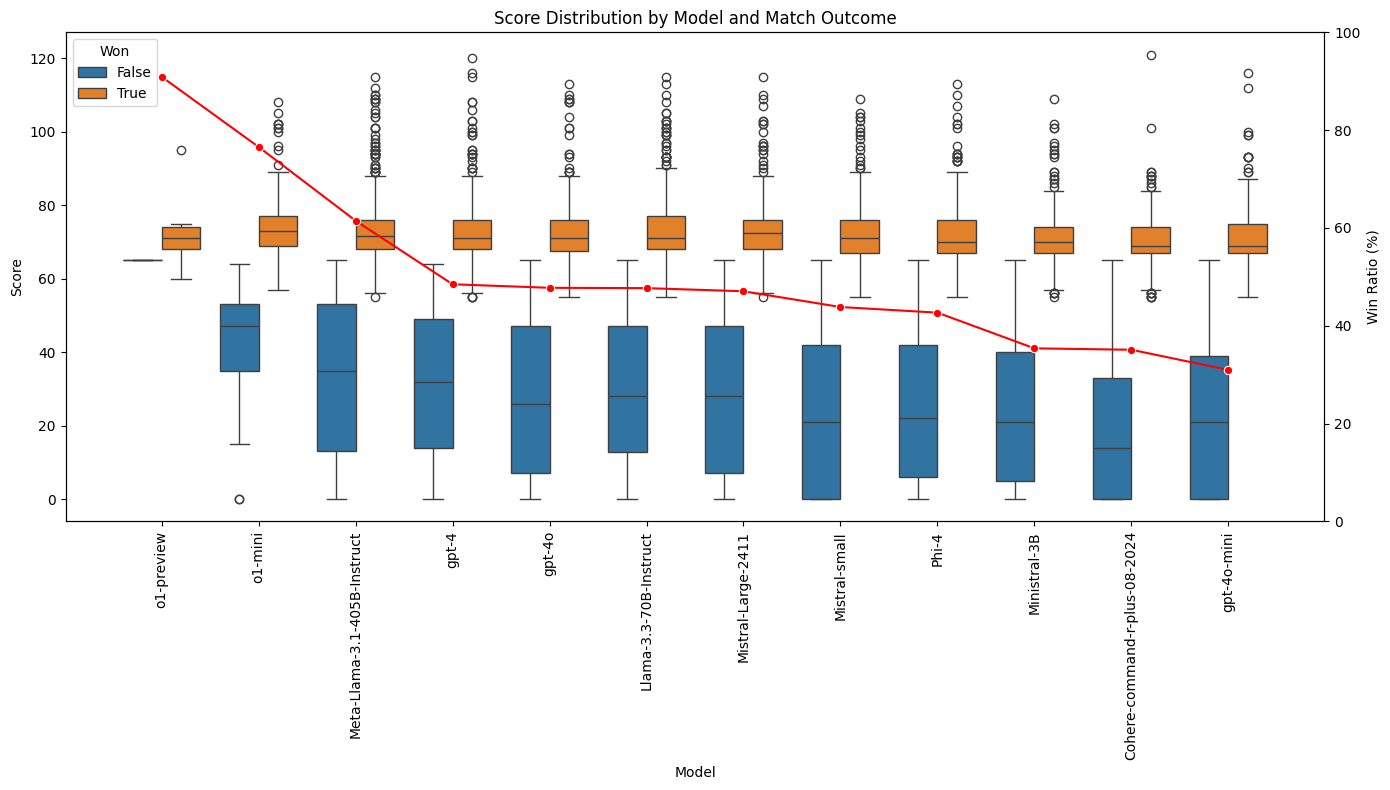

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter models with at least 100 matches
eligible_models = [
    "Cohere-command-r-plus-08-2024",
    "Llama-3.3-70B-Instruct",
    "Meta-Llama-3.1-405B-Instruct",
    "Ministral-3B",
    "Mistral-Large-2411",
    "Mistral-small",
    "Phi-4",
    "gpt-4",
    "gpt-4o",
    "gpt-4o-mini",
    "o1-mini",
    "o1-preview"
]

df_10 = df[df['model'].isin(eligible_models)]

# Calculate win ratio per model
win_ratio_df = df_10.groupby('model')['won'].mean().reset_index()
win_ratio_df['win_ratio_percent'] = (win_ratio_df['won'] * 100).round(2)

# Sort models by win ratio descending
sorted_models = win_ratio_df.sort_values('win_ratio_percent', ascending=False)['model']

# Set the order of models
df_10['model'] = pd.Categorical(df_10['model'], categories=sorted_models, ordered=True)

# Initialize the matplotlib figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create box and whiskers plot
sns.boxplot(x='model', y='score', hue='won', data=df_10, ax=ax1)
ax1.set_title('Score Distribution by Model and Match Outcome')
ax1.set_xlabel('Model')
# rotate x-axis labels
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.legend(title='Won')

# Create a second y-axis for win ratio
ax2 = ax1.twinx()

# Plot win ratio as a line plot
sns.lineplot(x='model', y='win_ratio_percent', data=win_ratio_df.sort_values('win_ratio_percent', ascending=False), sort=False, marker='o', color='red', ax=ax2)
ax2.set_ylabel('Win Ratio (%)')
ax2.set_ylim(0, 100)

# Adjust the x-axis to show all model names clearly
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [315]:

# Define opponents and assign a color palette
opponents = ['randbot', 'rdeepbot', 'gpt-4o-mini']
palette = sns.color_palette("bright", len(opponents))
palette_dict = dict(zip(opponents, palette))

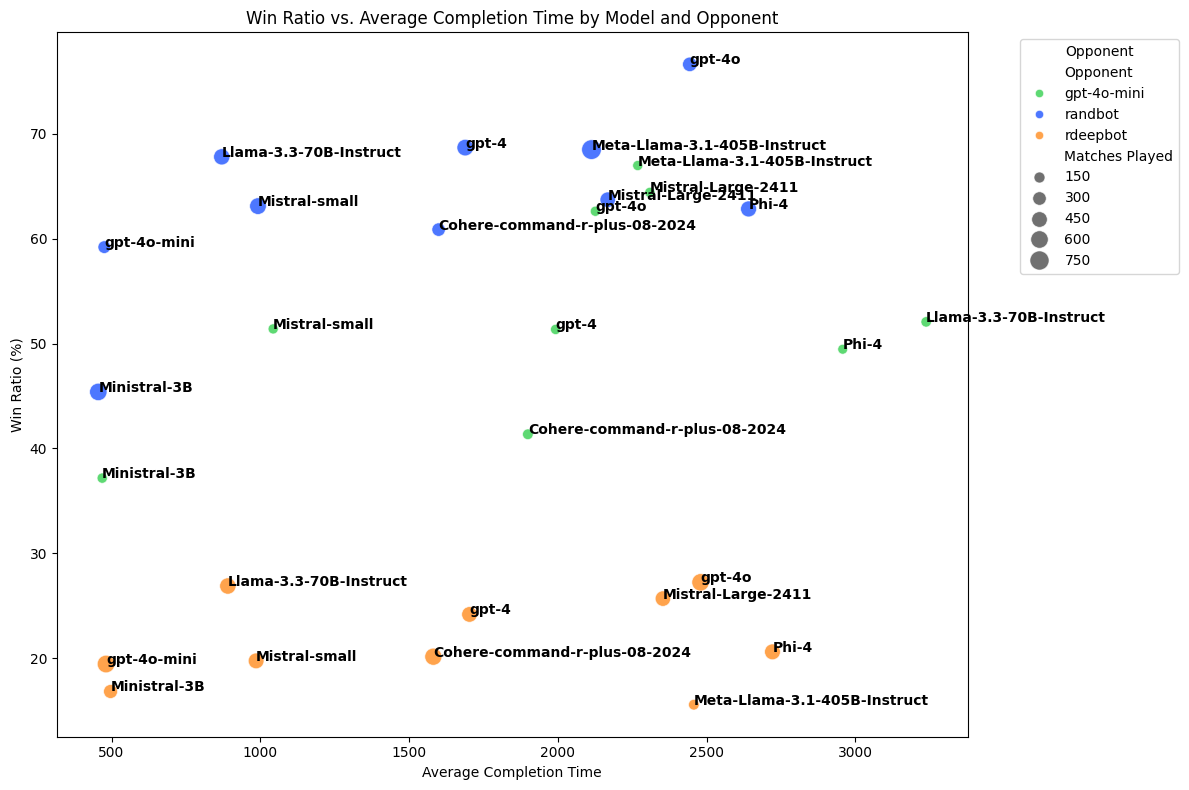

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt


models_not_o1 = eligible_models[:-2]


summary_filtered = summary[summary['Model'].isin(models_not_o1)]

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=summary_filtered,
    x='Average Completion Time',
    y='Win Ratio (%)',
    hue='Opponent',
    palette=palette_dict,
    size='Matches Played',
    sizes=(50, 200),
    alpha=0.7
)

plt.title('Win Ratio vs. Average Completion Time by Model and Opponent')
plt.xlabel('Average Completion Time')
plt.ylabel('Win Ratio (%)')
plt.legend(title='Opponent', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels for each model
for _, row in summary_filtered.iterrows():
    plt.text(
        row['Average Completion Time'],
        row['Win Ratio (%)'],
        row['Model'],
        horizontalalignment='left',
        size='medium',
        color='black',
        weight='semibold'
    )

plt.tight_layout()
plt.show()

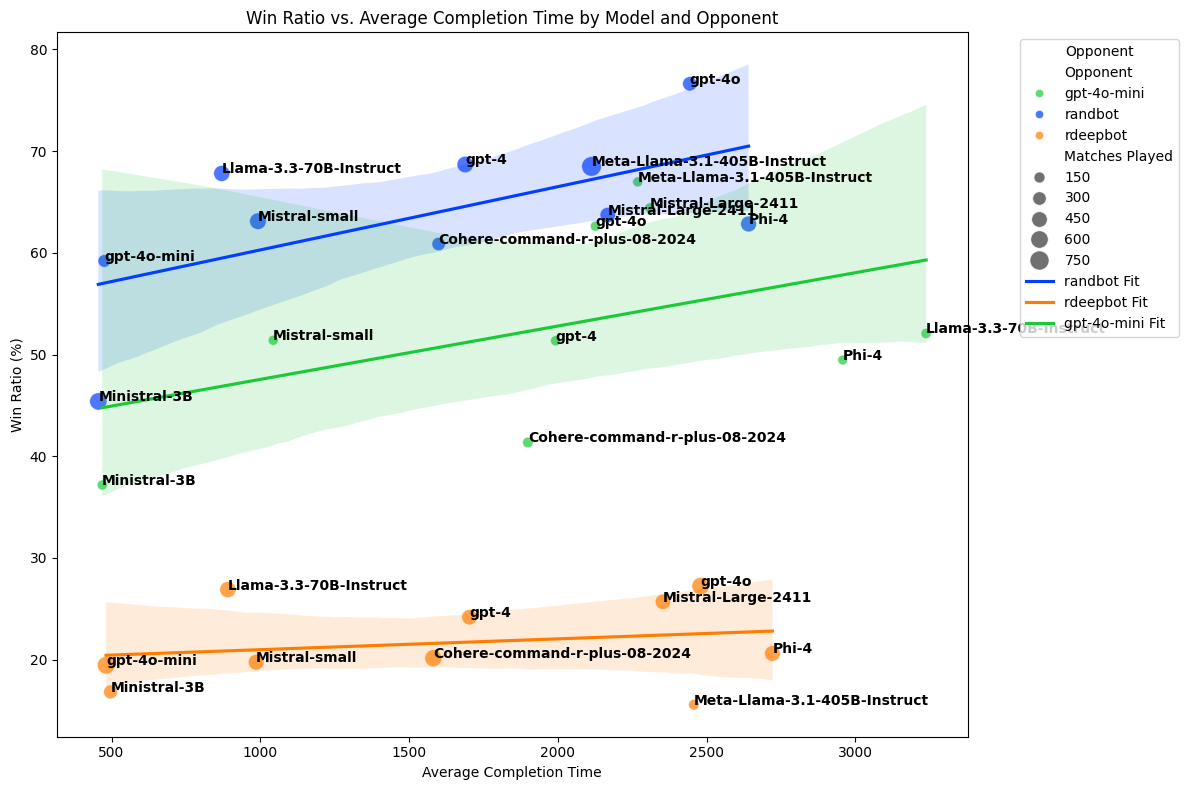

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=summary_filtered,
    x='Average Completion Time',
    y='Win Ratio (%)',
    hue='Opponent',
    palette=palette_dict,
    size='Matches Played',
    sizes=(50, 200),
    alpha=0.7
)

plt.title('Win Ratio vs. Average Completion Time by Model and Opponent')
plt.xlabel('Average Completion Time')
plt.ylabel('Win Ratio (%)')
plt.legend(title='Opponent', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels for each model
for _, row in summary_filtered.iterrows():
    plt.text(
        row['Average Completion Time'],
        row['Win Ratio (%)'],
        row['Model'],
        horizontalalignment='left',
        size='medium',
        color='black',
        weight='semibold'
    )

# Add regression lines for each opponent
opponents = ['randbot', 'rdeepbot', 'gpt-4o-mini']
for opponent in opponents:
    subset = summary_filtered[summary_filtered['Opponent'] == opponent]
    sns.regplot(
        data=subset,
        x='Average Completion Time',
        y='Win Ratio (%)',
        scatter=False,
        label=f'{opponent} Fit',
        color=palette_dict[opponent]
    )

plt.legend(title='Opponent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

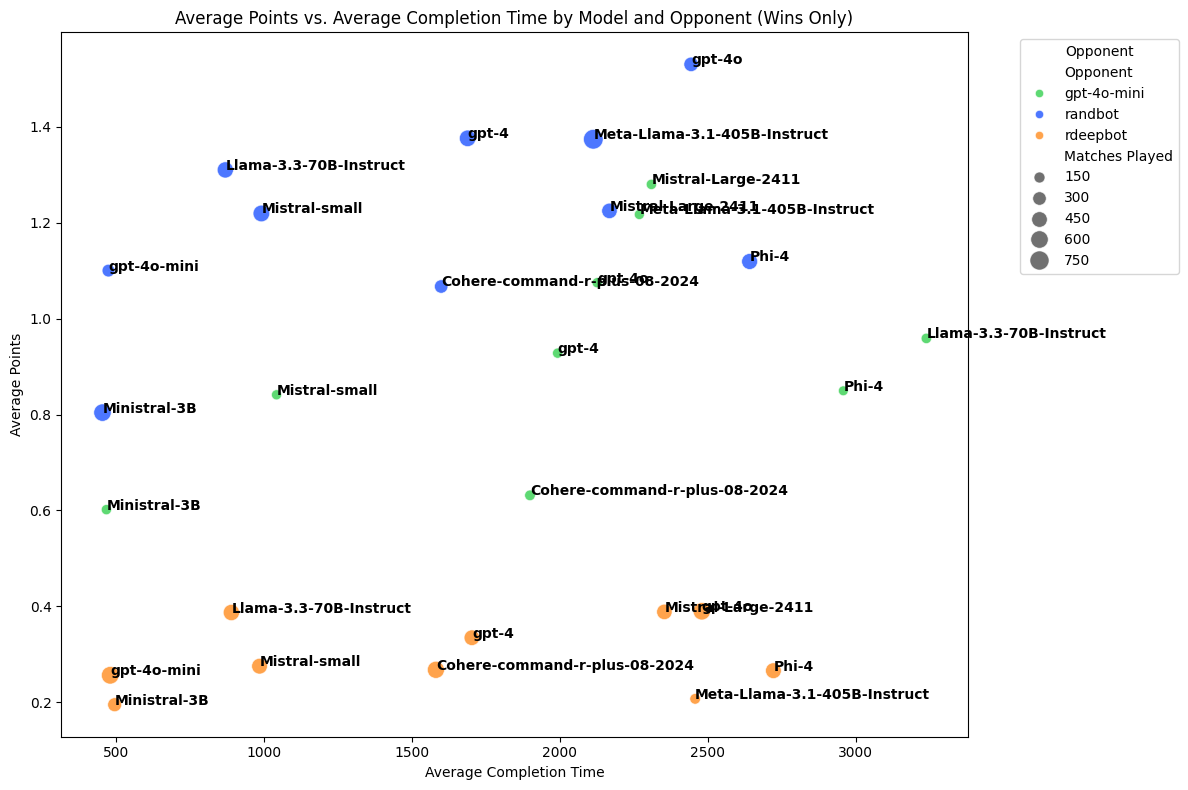

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter models
models_not_o1 = eligible_models[:-2]

# Filter the summary for selected models and only won matches
summary_filtered = summary[
    (summary['Model'].isin(models_not_o1)) & 
    (summary['Matches Won'] > 0)
]

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=summary_filtered,
    x='Average Completion Time',
    y='Average Points',
    hue='Opponent',
    palette=palette_dict,
    size='Matches Played',
    sizes=(50, 200),
    alpha=0.7
)

plt.title('Average Points vs. Average Completion Time by Model and Opponent (Wins Only)')
plt.xlabel('Average Completion Time')
plt.ylabel('Average Points')
plt.legend(title='Opponent', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels for each model
for _, row in summary_filtered.iterrows():
    plt.text(
        row['Average Completion Time'],
        row['Average Points'],
        row['Model'],
        horizontalalignment='left',
        size='medium',
        color='black',
        weight='semibold'
    )

plt.tight_layout()
plt.show()

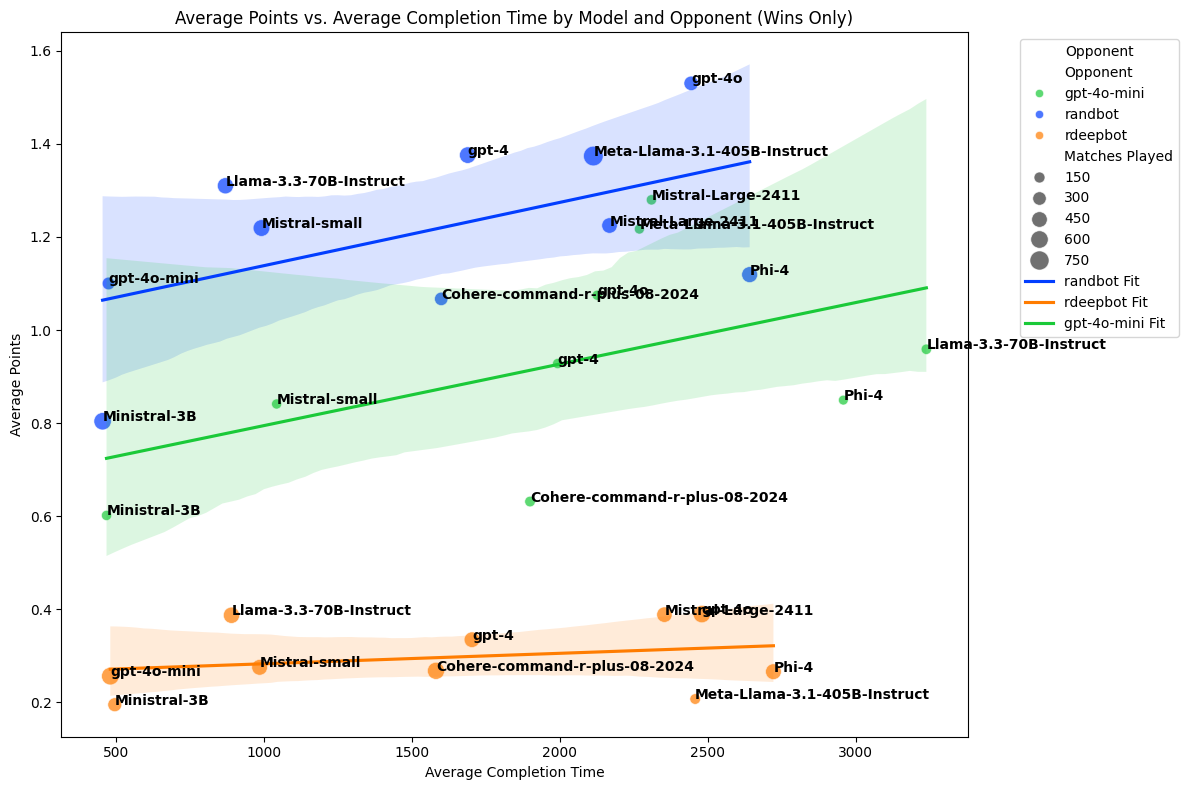

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter models
models_not_o1 = eligible_models[:-2]

# Filter the summary for selected models and only won matches
summary_filtered = summary[
    (summary['Model'].isin(models_not_o1)) & 
    (summary['Matches Won'] > 0)
]

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=summary_filtered,
    x='Average Completion Time',
    y='Average Points',
    hue='Opponent',
    palette=palette_dict,
    size='Matches Played',
    sizes=(50, 200),
    alpha=0.7
)

plt.title('Average Points vs. Average Completion Time by Model and Opponent (Wins Only)')
plt.xlabel('Average Completion Time')
plt.ylabel('Average Points')

# Add labels for each model
for _, row in summary_filtered.iterrows():
    plt.text(
        row['Average Completion Time'],
        row['Average Points'],
        row['Model'],
        horizontalalignment='left',
        size='medium',
        color='black',
        weight='semibold'
    )

# Add regression lines for each opponent
opponents = ['randbot', 'rdeepbot', 'gpt-4o-mini']
for opponent in opponents:
    subset = summary_filtered[summary_filtered['Opponent'] == opponent]
    sns.regplot(
        data=subset,
        x='Average Completion Time',
        y='Average Points',
        scatter=False,
        label=f'{opponent} Fit',
        color=palette_dict[opponent]
    )

plt.legend(title='Opponent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_9477/1756298684.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


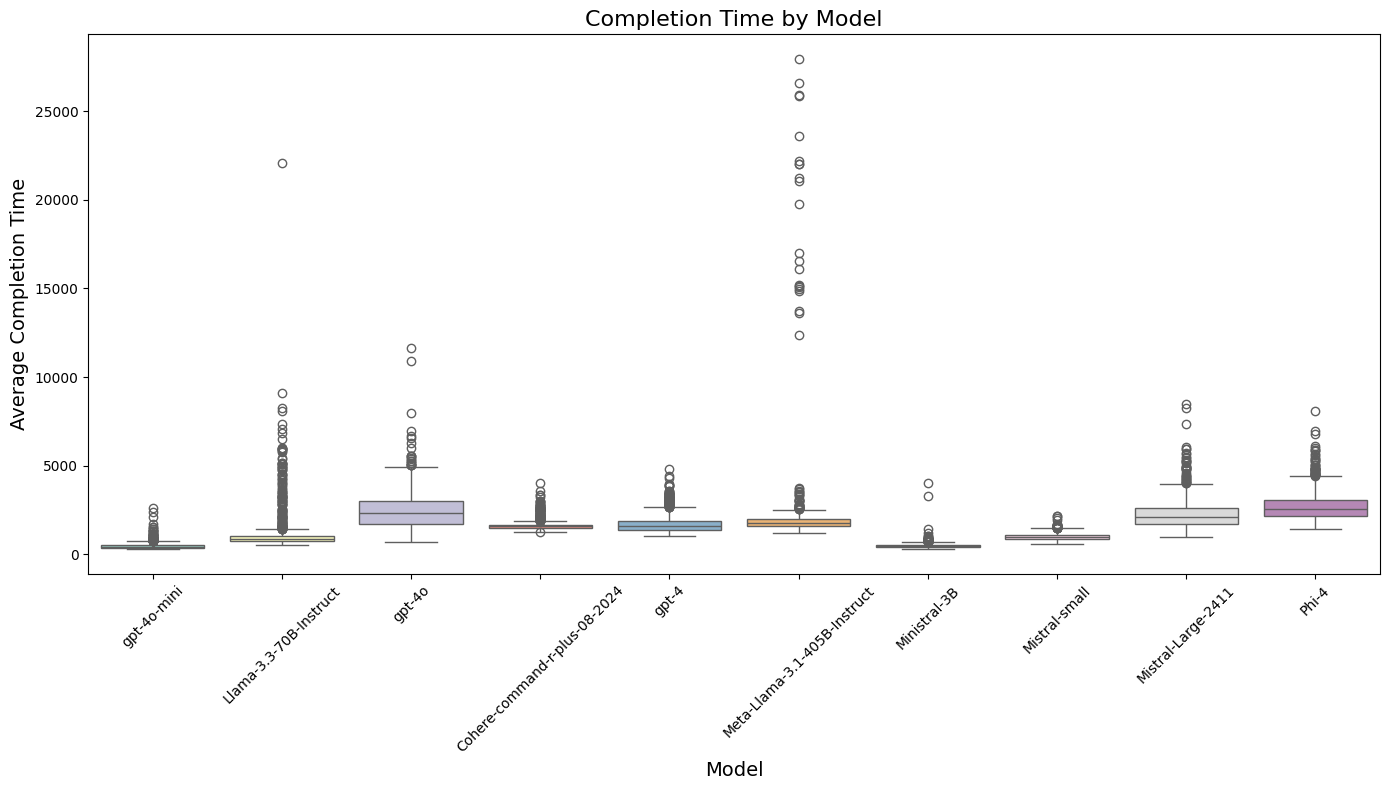

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for eligible models if necessary
models_not_o1 = eligible_models[:-2]
filtered_df = df[df['model'].isin(models_not_o1)]


# Create box plot for Average Completion Time by Model
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='model',
    y='avg_completion_time',
    data=filtered_df,
    palette='Set3'
)

plt.title('Completion Time by Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Average Completion Time', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

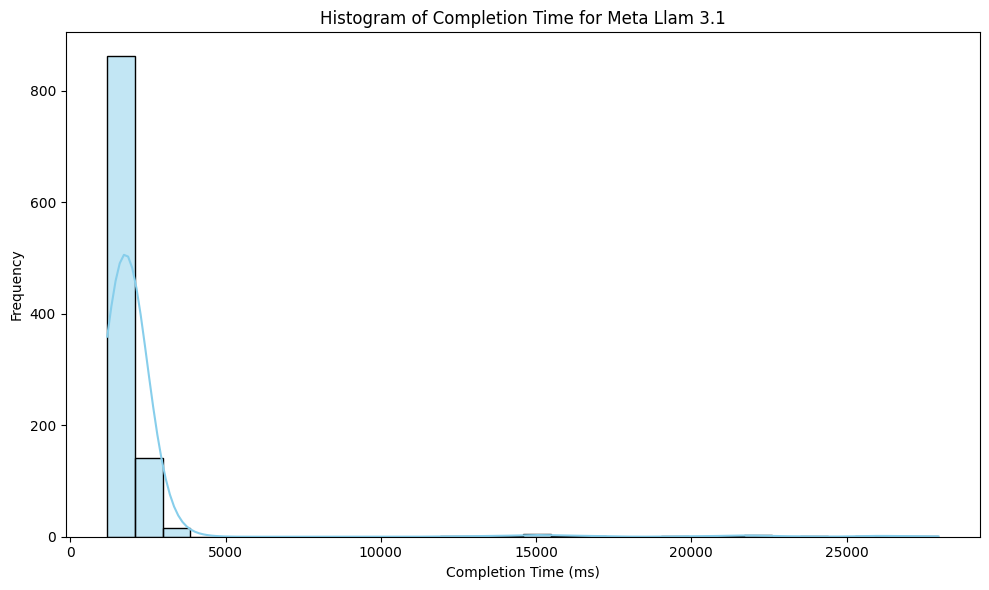

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for model 'meta llam 3.1'
meta_llam_df = df[df['model'] == 'Meta-Llama-3.1-405B-Instruct']

# Create histogram of completion time
plt.figure(figsize=(10, 6))
sns.histplot(meta_llam_df['avg_completion_time'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Completion Time for Meta Llam 3.1')
plt.xlabel('Completion Time (ms)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

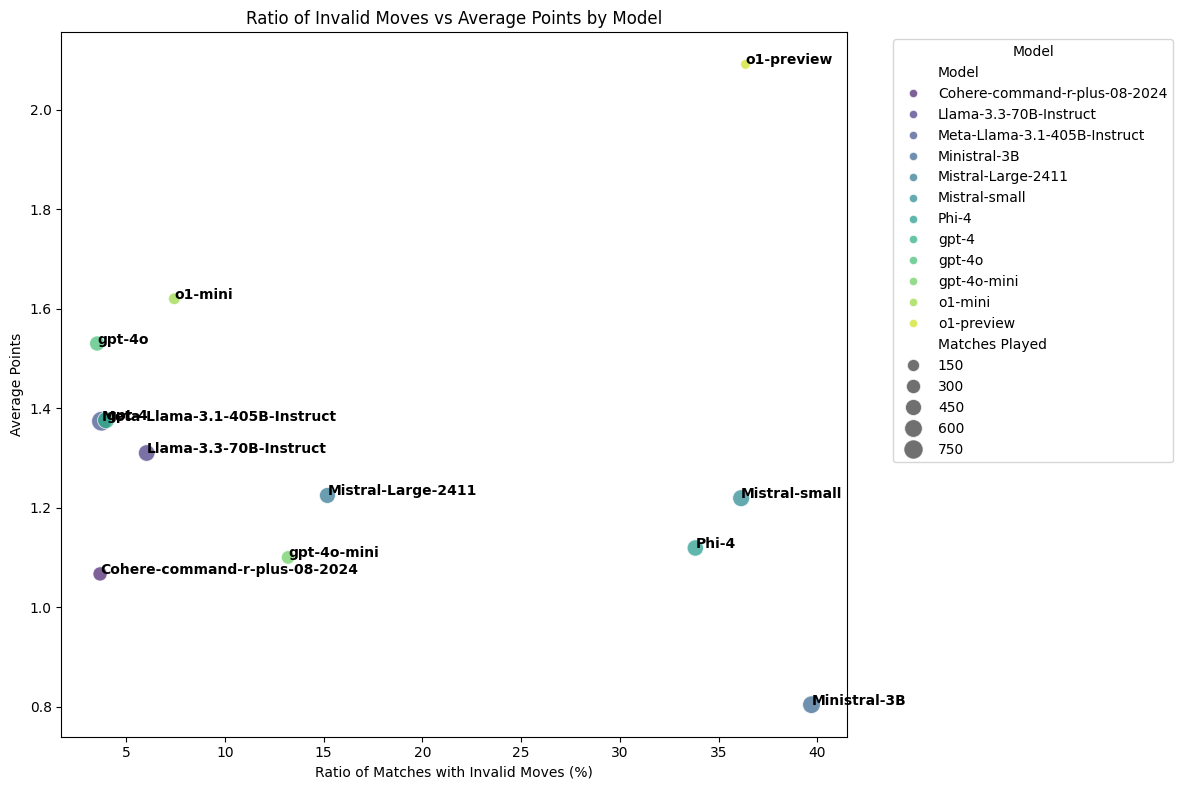

In [322]:
# Create scatter plot for Ratio of Invalid Moves vs Average Points by Model

    # 'model': 'Model',
    # 'matches_played': 'Matches Played',
    # 'matches_won': 'Matches Won',
    # 'win_ratio': 'Win Ratio (%)',
    # 'avg_score': 'Average Score',
    # 'avg_points': 'Average Points',
    # 'avg_completion_time': 'Average Completion Time',
    # 'number_invalid_moves': 'Number of Invalid Moves',
    # 'number_matches_with_invalid_moves': 'Matches with Invalid Moves',
    # 'ratio_matches_with_invalid_moves': 'Ratio Matches with Invalid Moves (%)'

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=summary_total,
    x='Ratio Matches with Invalid Moves (%)',
    y='Average Points',
    hue='Model',
    size='Matches Played',
    sizes=(50, 200),
    alpha=0.7,
    palette='viridis'
)

plt.title('Ratio of Invalid Moves vs Average Points by Model')
plt.xlabel('Ratio of Matches with Invalid Moves (%)')
plt.ylabel('Average Points')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels for each model
for _, row in summary_total.iterrows():
    plt.text(
        row['Ratio Matches with Invalid Moves (%)'],
        row['Average Points'],
        row['Model'],
        horizontalalignment='left',
        size='medium',
        color='black',
        weight='semibold'
    )

plt.tight_layout()
plt.show()

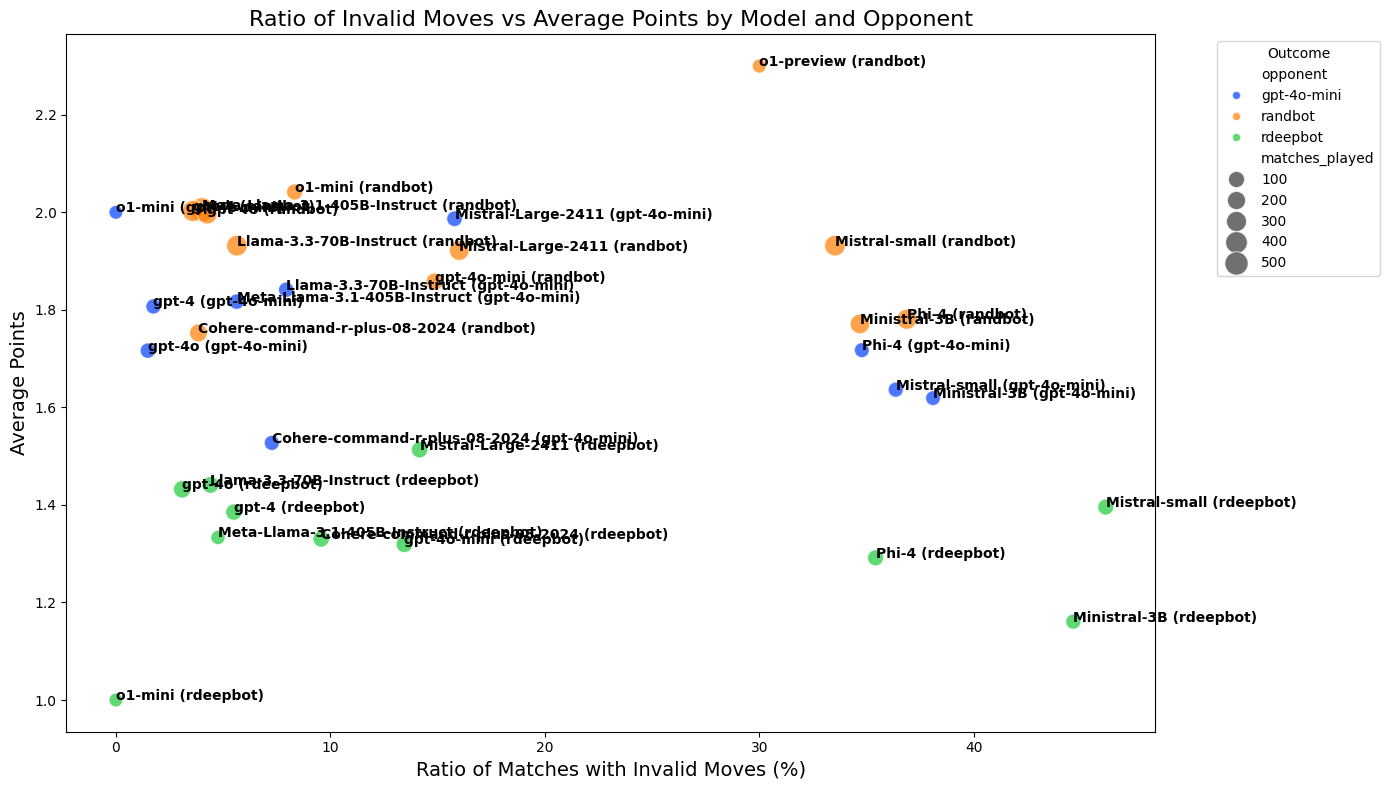

In [323]:

import seaborn as sns
import matplotlib.pyplot as plt

# filter to wins only
df_wins = df[df['won']]

# Create a summary DataFrame grouped by 'model' and 'opponent' status
summary_by_outcome = df_wins.groupby(['model', 'opponent']).agg(
    matches_played=('match_id', 'count'),
    avg_points=('points', 'mean'),
    matches_with_invalid_moves=('invalid_moves', lambda x: (x > 0).sum())
).reset_index()

# Calculate the ratio of matches with invalid moves
summary_by_outcome['ratio_matches_with_invalid_moves'] = (
    (summary_by_outcome['matches_with_invalid_moves'] / summary_by_outcome['matches_played']) * 100
).round(2)


# Define opponents and assign a color palette
opponents = ['randbot', 'rdeepbot', 'gpt-4o-mini']
palette = sns.color_palette("bright", len(opponents))
palette_dict = dict(zip(opponents, palette))


# Create scatter plot
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    data=summary_by_outcome,
    x='ratio_matches_with_invalid_moves',
    y='avg_points',
    hue='opponent',
    palette=palette,
    size='matches_played',
    sizes=(100, 300),
    alpha=0.7
)

plt.title('Ratio of Invalid Moves vs Average Points by Model and Opponent', fontsize=16)
plt.xlabel('Ratio of Matches with Invalid Moves (%)', fontsize=14)
plt.ylabel('Average Points', fontsize=14)
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels for each point
for _, row in summary_by_outcome.iterrows():
    plt.text(
        row['ratio_matches_with_invalid_moves'],
        row['avg_points'],
        f"{row['model']} ({row['opponent']})",
        horizontalalignment='left',
        size='medium',
        color='black',
        weight='semibold'
    )

plt.tight_layout()
plt.show()

In [324]:
# filter df, for completion time < 12500 and model name Meta-Llama-3.1-405B-Instruct
filtered_df = df[(df['avg_completion_time'] > 12500)]


#group by opponent and model
filtered_df['avg_completion_time'].groupby([filtered_df['opponent'], filtered_df['model']]).count()

opponent     model                       
gpt-4o-mini  Llama-3.3-70B-Instruct           1
             Meta-Llama-3.1-405B-Instruct     3
             o1-mini                          1
randbot      Meta-Llama-3.1-405B-Instruct    13
             o1-mini                         99
             o1-preview                      11
rdeepbot     Meta-Llama-3.1-405B-Instruct     5
             o1-mini                          6
Name: avg_completion_time, dtype: int64

/tmp/ipykernel_9477/134545245.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


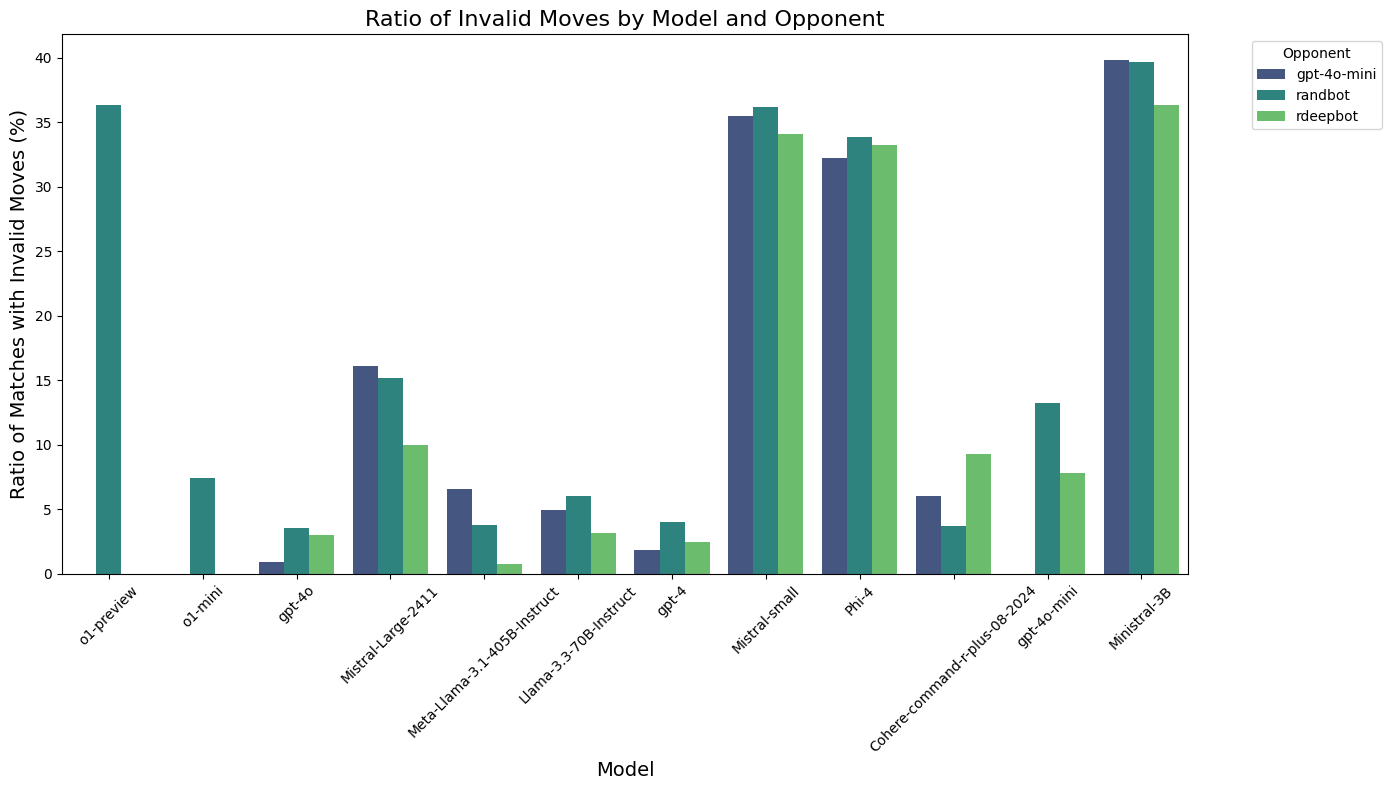

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'summary' is your DataFrame grouped by 'Model' and 'Opponent'

# Calculate average Win Ratio (%) per Model
avg_win_ratio = summary.groupby('Model')['Win Ratio (%)'].mean().reset_index()

# Sort Models by average Win Ratio (%) in descending order
sorted_models = avg_win_ratio.sort_values('Win Ratio (%)', ascending=False)['Model']

# Create a categorical type for 'Model' to maintain the sorted order in the plot
summary['Model'] = pd.Categorical(summary['Model'], categories=sorted_models, ordered=True)

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create bar plot
sns.barplot(
    data=summary,
    x='Model',
    y='Ratio Matches with Invalid Moves (%)',
    hue='Opponent',
    palette='viridis',
    ci=None
)

# Customize the plot
plt.title('Ratio of Invalid Moves by Model and Opponent', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Ratio of Matches with Invalid Moves (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Opponent', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the plot
plt.show()

Pearson Correlation Coefficient between Average Completion Time and Points: 0.1090


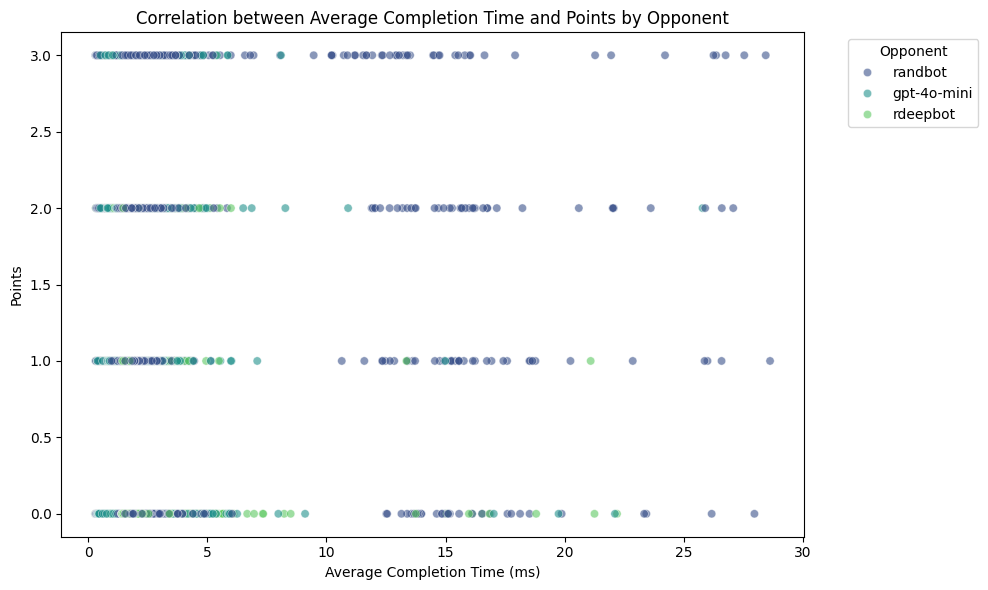

Regression R-squared: 0.1861
Regression Mean Squared Error: 0.8737

Regression Coefficients:
avg_completion_time    0.035141
opponent_randbot       0.305842
opponent_rdeepbot     -0.604218
dtype: float64

Intercept: 0.8556


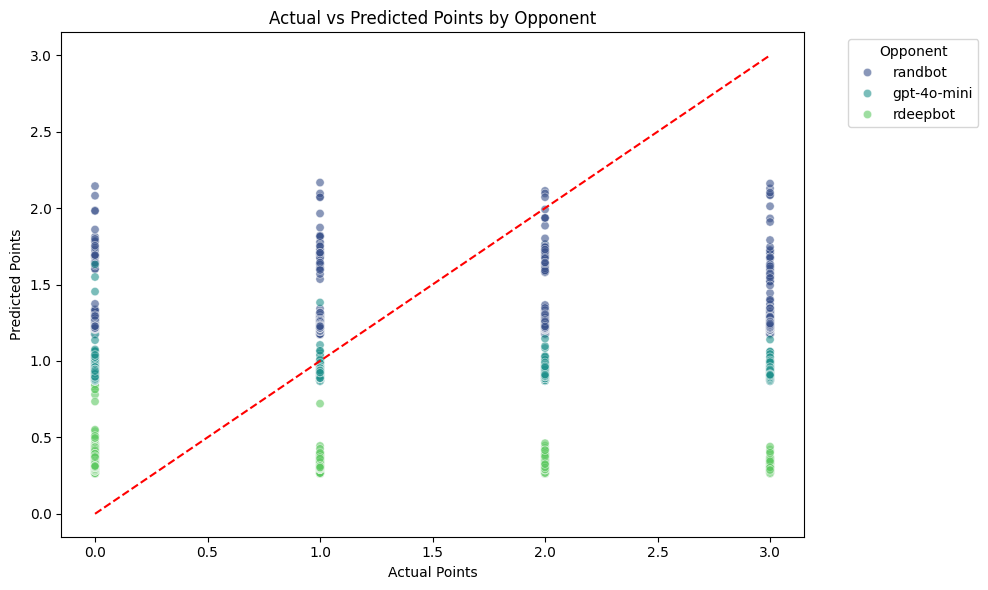

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     800.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:23:05   Log-Likelihood:                -14204.
No. Observations:               10510   AIC:                         2.842e+04
Df Residuals:                   10506   BIC:                         2.844e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8556    

In [338]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming 'df' is your DataFrame and it's already loaded

# Step 1: Data Preparation

# Ensure necessary columns are present
required_columns = ['avg_completion_time', 'points', 'opponent']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"DataFrame must contain the columns: {required_columns}")

# Drop rows with missing values in the required columns
df_clean = df.dropna(subset=required_columns)

# # normalize the avg_completion_time column
# df_clean['avg_completion_time'] = (df_clean['avg_completion_time'] - df_clean['avg_completion_time'].mean()) / df_clean['avg_completion_time'].std()

# transform the avg_completion_time column to seconds
df_clean['avg_completion_time'] = df_clean['avg_completion_time'] / 1000

# One-Hot Encode the 'opponent' column
encoder = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap
opponent_encoded = encoder.fit_transform(df_clean[['opponent']])

# Create a DataFrame for the encoded opponents
opponent_cols = encoder.get_feature_names_out(['opponent'])
# df_opponents = pd.DataFrame(opponent_encoded, columns=opponent_cols, index=df_clean.index)
df_opponents = pd.DataFrame(opponent_encoded.toarray(), columns=opponent_cols, index=df_clean.index)

# Combine the original DataFrame with the encoded opponents
df_regression = pd.concat([df_clean, df_opponents], axis=1)

# Define feature matrix X and target vector y
X = df_regression[['avg_completion_time'] + list(opponent_cols)]
y = df_regression['points']

# Step 2: Compute Correlation Coefficient

# Calculate Pearson correlation coefficient between 'avg_completion_time' and 'points'
pearson_corr = df_clean['avg_completion_time'].corr(df_clean['points'])
print(f"Pearson Correlation Coefficient between Average Completion Time and Points: {pearson_corr:.4f}")

# Visualize the correlation with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_completion_time', y='points', data=df_clean, hue='opponent', palette='viridis', alpha=0.6)
plt.title('Correlation between Average Completion Time and Points by Opponent')
plt.xlabel('Average Completion Time (ms)')
plt.ylabel('Points')
plt.legend(title='Opponent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 3: Regression Analysis

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R-squared and Mean Squared Error
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"Regression R-squared: {r2:.4f}")
print(f"Regression Mean Squared Error: {mse:.4f}")

# Coefficients interpretation
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_
print("\nRegression Coefficients:")
print(coefficients)
print(f"\nIntercept: {intercept:.4f}")

# Step 4: Visualize Regression Results

# Plot actual vs predicted points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=y_pred, hue=df_clean['opponent'], palette='viridis', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line y=x for reference
plt.title('Actual vs Predicted Points by Opponent')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.legend(title='Opponent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Optional: Display Regression Summary using statsmodels for more detailed statistics
import statsmodels.api as sm

# Add a constant term for the intercept
X_sm = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model
ols_model = sm.OLS(y, X_sm).fit()

# Display the regression summary
print(ols_model.summary())

In [337]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

# Assuming 'df' is your DataFrame and it's already loaded

# Step 1: Data Preparation

# Ensure necessary columns are present
required_columns = ['avg_completion_time', 'points', 'opponent', 'model']

# Drop rows with missing values in the required columns
df_clean = df.dropna(subset=required_columns)

# remove rows with avg_completion_time > 12500
df_clean = df_clean[(df_clean['avg_completion_time'] < 12500)]

# One-Hot Encode the 'opponent' and 'model' columns
encoder = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap
encoded_features = encoder.fit_transform(df_clean[['opponent', 'model']])

# Create a DataFrame for the encoded features
encoded_cols = encoder.get_feature_names_out(['opponent', 'model'])
df_encoded = pd.DataFrame(encoded_features.toarray(), columns=encoded_cols, index=df_clean.index)

# Combine the original DataFrame with the encoded features
df_regression = pd.concat([df_clean, df_encoded], axis=1)

# Define feature matrix X and target vector y
X = df_regression[['avg_completion_time'] + list(encoded_cols)]
y = df_regression['points']

# Add a constant term for the intercept
X_sm = sm.add_constant(X)

# Step 2: Compute Correlation Coefficient

# Calculate Pearson correlation coefficient between 'avg_completion_time' and 'points'
pearson_corr = df_clean['avg_completion_time'].corr(df_clean['points'])
print(f"Pearson Correlation Coefficient between Average Completion Time and Points: {pearson_corr:.4f}")

# Step 3: Regression Analysis

# Fit the OLS regression model using statsmodels
ols_model = sm.OLS(y, X_sm).fit()

# Display the regression summary
print(ols_model.summary())

# Step 4: Visualize Regression Results

# Make predictions
y_pred = ols_model.predict(X_sm)

# Calculate R-squared and Mean Squared Error
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"Regression R-squared: {r2:.4f}")
print(f"Regression Mean Squared Error: {mse:.4f}")


Pearson Correlation Coefficient between Average Completion Time and Points: 0.1161
                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     203.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:22:45   Log-Likelihood:                -13875.
No. Observations:               10371   AIC:                         2.778e+04
Df Residuals:                   10357   BIC:                         2.788e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------